Sources:
1. https://physionet.org/content/gossis-1-eicu/1.0.0/

2. https://www.kaggle.com/code/akumar99/hw5-patient-survival

3. https://www.kaggle.com/code/danofer/wids-2020-starter-catboost-0-9045-lb/notebook

In [ ]:

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random


# Load data
url1 = "/content/drive/MyDrive/Colab Notebooks/GOSSIS/gossis-1-eicu-only-model-ready.csv.gz"
df1 = pd.read_csv(url1, compression='gzip')

url = '/content/drive/MyDrive/Colab Notebooks/GOSSIS/gossis-1-eicu-only.csv.gz'
df = pd.read_csv(url, compression='gzip')


import warnings
warnings.simplefilter('ignore')

## Pre-processing and baseline classification

In [ ]:
df1.columns

Index(['patientunitstayid', 'encounter_id', 'partition', 'age',
       'd1_diasbp_avg', 'd1_heartrate_avg', 'd1_mbp_avg', 'd1_resprate_avg',
       'd1_spo2_avg', 'd1_sysbp_avg', 'd1_temp_avg', 'd1_albumin_avg',
       'd1_bilirubin_avg', 'd1_bun_avg', 'd1_creatinine_avg', 'd1_glucose_avg',
       'd1_hco3_avg', 'd1_hemaglobin_avg', 'd1_hematocrit_avg', 'd1_inr_avg',
       'd1_lactate_avg', 'd1_platelets_avg', 'd1_potassium_avg',
       'd1_sodium_avg', 'd1_calcium_avg', 'd1_wbc_avg', 'd1_arterial_pco2_avg',
       'd1_arterial_ph_avg', 'd1_arterial_po2_avg', 'd1_pao2fio2ratio_avg',
       'd1_diasbp_diff', 'd1_heartrate_diff', 'd1_mbp_diff',
       'd1_resprate_diff', 'd1_spo2_diff', 'd1_sysbp_diff', 'd1_temp_diff',
       'd1_albumin_diff', 'd1_bilirubin_diff', 'd1_bun_diff',
       'd1_creatinine_diff', 'd1_glucose_diff', 'd1_hco3_diff',
       'd1_hemaglobin_diff', 'd1_hematocrit_diff', 'd1_inr_diff',
       'd1_lactate_diff', 'd1_platelets_diff', 'd1_potassium_diff',
       'd1_s

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.7 MB/s eta 0:00:00


In [ ]:
df.info()

In [ ]:
column_names = df.columns.tolist()
print(column_names)

['patientunitstayid', 'data_source', 'encounter_id', 'hospital_id', 'patient_id', 'age', 'bmi', 'country', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'hospital_bed_size', 'hospital_bed_size_numeric', 'hospital_death', 'hospital_disch_location', 'hospital_los_days', 'hospital_type', 'icu_admit_source', 'icu_admit_type', 'icu_death', 'icu_disch_location', 'icu_id', 'icu_los_days', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'pregnant', 'readmission_status', 'smoking_status', 'teaching_hospital', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', '

In [ ]:
# Specify columns to be added from df1 to df2
columns_to_add = ['d1_pao2fio2ratio_avg', 'd1_arterial_pco2_avg', 'd1_arterial_ph_avg', 'd1_arterial_po2_avg', 'd1_inr_avg', 'd1_lactate_avg', 'd1_albumin_avg', 'd1_bilirubin_avg',
                  'd1_wbc_avg', 'd1_diasbp_diff', 'd1_heartrate_diff', 'd1_mbp_diff', 'd1_resprate_diff',  'd1_heartrate_avg', 'd1_glucose_avg', 'dcs_group', 'd1_bun_avg', 'dx_class', 'dx_sub', 'group']

# Merge DataFrames based on "encounter_id" and add specified columns
merged_df = pd.merge(df, df1[columns_to_add + ['encounter_id']], on='encounter_id', how='left')

df = merged_df
# Assuming df is your original DataFrame with 10 columns
columns_to_keep = ['age', 'bmi', 'd1_pao2fio2ratio_avg', 'd1_arterial_pco2_avg', 'd1_arterial_ph_avg', 'd1_arterial_po2_avg', 'd1_inr_avg', 'd1_lactate_avg', 'd1_albumin_avg', 'd1_bilirubin_avg',
                  'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source',
                   'hospital_death', 'hospital_los_days',
                   'icu_admit_source', 'icu_stay_type',
                   'icu_type', 'pre_icu_los_days', 'readmission_status',
                   'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
                   'd1_heartrate_max', 'd1_heartrate_min',  'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min',
                   'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
                   'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max',
                   'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max',
                   'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_platelets_max',
                   'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'aids', 'cirrhosis',
                   'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'd1_wbc_avg',
                   'd1_diasbp_diff', 'd1_heartrate_diff', 'd1_mbp_diff', 'd1_resprate_diff',  'd1_heartrate_avg', 'd1_glucose_avg', 'dcs_group', 'd1_bun_avg', 'dx_class', 'dx_sub',
                    'icu_los_days', 'group' ] #'icu_disch_location',

# Drop columns that are not in the specified list
df = df[columns_to_keep]

In [ ]:
#columns_to_drop = ['smoking_status']
#df = df.drop(columns=columns_to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131051 entries, 0 to 131050
Data columns (total 87 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          125169 non-null  float64
 1   bmi                          126518 non-null  float64
 2   d1_pao2fio2ratio_avg         131051 non-null  float64
 3   d1_arterial_pco2_avg         131051 non-null  float64
 4   d1_arterial_ph_avg           131051 non-null  float64
 5   d1_arterial_po2_avg          131051 non-null  float64
 6   d1_inr_avg                   131051 non-null  float64
 7   d1_lactate_avg               131051 non-null  float64
 8   d1_albumin_avg               131051 non-null  float64
 9   d1_bilirubin_avg             131051 non-null  float64
 10  elective_surgery             131051 non-null  int64  
 11  ethnicity                    129457 non-null  object 
 12  gender                       130985 non-null  object 
 13 

In [ ]:
df = df.dropna()
print('Length after removing Duplicates:', len(df))

Length after removing Duplicates: 19996


In [ ]:
#df.drop_duplicates(['patient_id'], keep = 'first', inplace = True)
#print('Length after removing Duplicates:', len(df))

Cardiovascular             41396
Neurological               17885
Respiratory                16894
Sepsis                     16402
Gastrointestinal           12977
Metabolic                  10753
Trauma                      6237
Genitourinary               2992
Other medical disorders     2579
Musculoskeletal/Skin        1669
Hematological                830
Gynecological                437

In [ ]:
columns_to_analyze = ['ethnicity', 'gender', 'hospital_death', 'icu_type', 'hospital_admit_source',  'dcs_group', 'dx_class', 'dx_class', 'hospital_los_days', 'group']

for column in columns_to_analyze:
    unique_classes_counts = df[column].value_counts()
    print(f"Column: {column}")
    print(unique_classes_counts)
    print("\n")

Column: ethnicity
Caucasian           16234
African American     1824
Other/Unknown         835
Hispanic              670
Asian                 282
Native American       151
Name: ethnicity, dtype: int64


Column: gender
M    11816
F     8180
Name: gender, dtype: int64


Column: hospital_death
0    17424
1     2572
Name: hospital_death, dtype: int64


Column: icu_type
Med-Surg ICU    8341
CSICU           2269
CCU-CTICU       2209
SICU            2077
Neuro ICU       1740
CTICU           1582
MICU            1023
Cardiac ICU      755
Name: icu_type, dtype: int64


Column: hospital_admit_source
Operating Room          8194
Emergency Department    5195
Recovery Room           1732
Floor                   1593
Direct Admit            1469
PACU                     563
Other Hospital           472
Acute Care/Floor         309
Step-Down Unit (SDU)     308
Chest Pain Center         63
Other ICU                 50
ICU to SDU                31
ICU                       11
Observation            

In [ ]:
df.columns

Index(['age', 'bmi', 'd1_pao2fio2ratio_avg', 'd1_arterial_pco2_avg',
       'd1_arterial_ph_avg', 'd1_arterial_po2_avg', 'd1_inr_avg',
       'd1_lactate_avg', 'd1_albumin_avg', 'd1_bilirubin_avg',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source', 'hospital_death', 'hospital_los_days',
       'icu_admit_source', 'icu_stay_type', 'icu_type', 'pre_icu_los_days',
       'readmission_status', 'd1_diasbp_invasive_max',
       'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'd1_bun_max', 'd1_bun_min',
       'd1_calcium_max', 'd1_calcium_mi

In [ ]:
df['hospital_death'] = df['hospital_death'].astype(int)

In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report


feature_set = df.columns

feature_set = df[feature_set]

X = df.drop('hospital_death', axis=1)
y = df['hospital_death']





# Convert categorical features to strings
categorical_features_indices = X.select_dtypes(include=['object']).columns
#X[categorical_features_indices] = X[categorical_features_indices].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## catBoost Pool object
train_pool = Pool(data=X_train, label=y_train, cat_features=list(categorical_features_indices),
#                   baseline= X_train[""], ##
#
                 )

### hyperparameter tuning example grid for catboost :
grid = {'learning_rate': [0.04, 0.1],
        'depth': [7, 11],
#         'l2_leaf_reg': [1, 3,9],
        "iterations": [500],
       "custom_metric":['Logloss', 'AUC']}

# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier()
#catboost_model = CatBoostClassifier(iterations=300, depth=10, learning_rate=0.05, loss_function='Logloss', eval_metric='Accuracy', cat_features=list(categorical_features_indices))


## can also do randomized search - more efficient typically, especially for large search space - `randomized_search`
grid_search_result = catboost_model.grid_search(grid,
                                       train_pool,
                                       plot=True,
                                       refit = True, #  refit best model on all data
                                      partition_random_seed=42)

# Train the model on the training data
catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))  # Convert to list here

# Predict on the testing data
y_pred = catboost_model.predict(X_test)



# Evaluate the model's performance
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)



# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)
'''

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report


feature_set = df.columns

feature_set = df[feature_set]

X = df.drop('hospital_death', axis=1)
y = df['hospital_death']





# Convert categorical features to strings
categorical_features_indices = X.select_dtypes(include=['object']).columns
#X[categorical_features_indices] = X[categorical_features_indices].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=500, depth=7, learning_rate=0.04, loss_function='Logloss', eval_metric='Accuracy', cat_features=list(categorical_features_indices))

# Train the model on the training data
catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))  # Convert to list here

# Predict on the testing data
y_pred = catboost_model.predict(X_test)



# Evaluate the model's performance
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)



# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

0:	learn: 0.9151038	total: 131ms	remaining: 1m 5s
1:	learn: 0.9155414	total: 242ms	remaining: 1m
2:	learn: 0.9166042	total: 356ms	remaining: 58.9s
3:	learn: 0.9167917	total: 454ms	remaining: 56.3s
4:	learn: 0.9177919	total: 559ms	remaining: 55.4s
5:	learn: 0.9179170	total: 661ms	remaining: 54.4s
6:	learn: 0.9183546	total: 747ms	remaining: 52.6s
7:	learn: 0.9187922	total: 853ms	remaining: 52.5s
8:	learn: 0.9184796	total: 952ms	remaining: 51.9s
9:	learn: 0.9192298	total: 1.05s	remaining: 51.3s
10:	learn: 0.9200425	total: 1.14s	remaining: 50.9s
11:	learn: 0.9206677	total: 1.24s	remaining: 50.3s
12:	learn: 0.9207302	total: 1.33s	remaining: 49.9s
13:	learn: 0.9207927	total: 1.43s	remaining: 49.6s
14:	learn: 0.9214804	total: 1.52s	remaining: 49.2s
15:	learn: 0.9216679	total: 1.64s	remaining: 49.7s
16:	learn: 0.9219180	total: 1.74s	remaining: 49.3s
17:	learn: 0.9220430	total: 1.83s	remaining: 49s
18:	learn: 0.9222931	total: 1.92s	remaining: 48.7s
19:	learn: 0.9227307	total: 2.01s	remaining: 4

In [ ]:
#print("best model params: \n",grid_search_result["params"])


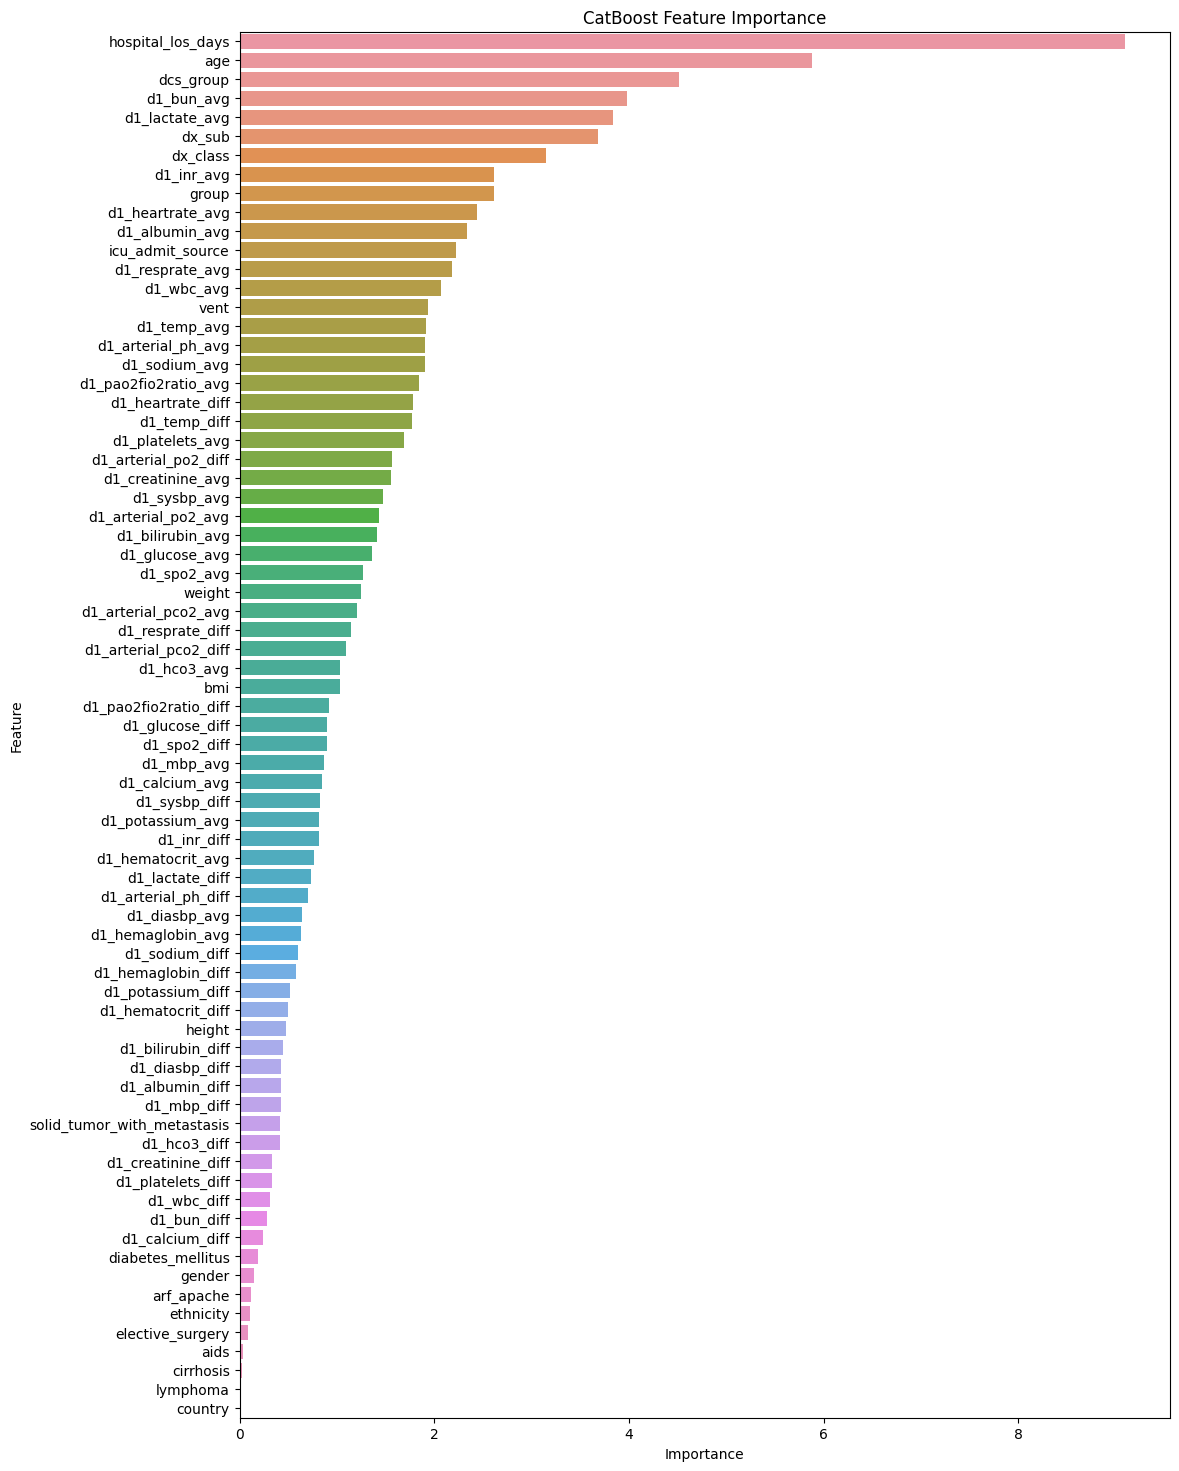

In [ ]:
# Extract feature importance
feature_importance = catboost_model.get_feature_importance()

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 18))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('CatBoost Feature Importance')
plt.show()

## Generalization

### Age

In [ ]:
from collections import deque
df['age'] = df['age'].astype(float)
class TreeNode:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.children = []

def build_tree(data, level, node):
    if level == 0 or len(data) < 10:
        return

    step = (node.end - node.start) / 2
    left_child = TreeNode(node.start, node.start + step)
    right_child = TreeNode(node.start + step, node.end)

    node.children.append(left_child)
    node.children.append(right_child)

    left_data = data[(data >= left_child.start) & (data <= left_child.end)]
    right_data = data[(data > left_child.end) & (data <= right_child.end)]

    build_tree(left_data, level - 1, left_child)
    build_tree(right_data, level - 1, right_child)

def print_tree(tree):
    queue = deque([(tree, 0)])  # Store nodes and their levels in a queue

    while queue:
        level_nodes = []  # Store nodes at the current level
        level = queue[0][1]  # Get the level of the first node in the queue

        # Process nodes at the current level
        while queue and queue[0][1] == level:
            node, _ = queue.popleft()
            level_nodes.append(node)

        # Print level name and clusters with intervals
        print(f"Level {level}:")
        for node in level_nodes:
            start = int(node.start)
            end = int(node.end)
            print(f"  Cluster {level_nodes.index(node)}: ({start}, {end}]")

        # Add child nodes to the queue for the next level
        for node in level_nodes:
            queue.extend([(child, level + 1) for child in node.children])

        print()  # Add a line break after each level


age_column = df['age']
min_age = age_column.min()
max_age = age_column.max()

# Build the tree with 5 levels
#original
root = TreeNode(min_age, max_age)
#adjusted
#root = TreeNode(min_age, max_age + 1)
build_tree(age_column, 5, root)


print_tree(root)

Level 0:
  Cluster 0: (16, 89]

Level 1:
  Cluster 0: (16, 52]
  Cluster 1: (52, 89]

Level 2:
  Cluster 0: (16, 34]
  Cluster 1: (34, 52]
  Cluster 2: (52, 70]
  Cluster 3: (70, 89]

Level 3:
  Cluster 0: (16, 25]
  Cluster 1: (25, 34]
  Cluster 2: (34, 43]
  Cluster 3: (43, 52]
  Cluster 4: (52, 61]
  Cluster 5: (61, 70]
  Cluster 6: (70, 79]
  Cluster 7: (79, 89]

Level 4:
  Cluster 0: (16, 20]
  Cluster 1: (20, 25]
  Cluster 2: (25, 29]
  Cluster 3: (29, 34]
  Cluster 4: (34, 38]
  Cluster 5: (38, 43]
  Cluster 6: (43, 47]
  Cluster 7: (47, 52]
  Cluster 8: (52, 57]
  Cluster 9: (57, 61]
  Cluster 10: (61, 66]
  Cluster 11: (66, 70]
  Cluster 12: (70, 75]
  Cluster 13: (75, 79]
  Cluster 14: (79, 84]
  Cluster 15: (84, 89]

Level 5:
  Cluster 0: (16, 18]
  Cluster 1: (18, 20]
  Cluster 2: (20, 22]
  Cluster 3: (22, 25]
  Cluster 4: (25, 27]
  Cluster 5: (27, 29]
  Cluster 6: (29, 31]
  Cluster 7: (31, 34]
  Cluster 8: (34, 36]
  Cluster 9: (36, 38]
  Cluster 10: (38, 41]
  Cluster 

In [ ]:
import math

# Convert the 'age_column' to a numeric data type, handling non-numeric values with 'coerce'
age_column = pd.to_numeric(df['age'], errors='coerce')

# After this conversion, the 'age_column' should contain numeric data, and the error should be resolved.
min_age = age_column.min()
max_age = age_column.max()


# Build the tree with 5 levels
root = TreeNode(min_age, max_age)
build_tree(age_column, 5, root)

# Convert the tree structure to a dictionary of age clusters by level
age_clusters_by_level = {}
def traverse_tree(node, level, clusters):
    if level not in clusters:
        clusters[level] = []
    clusters[level].append([(node.start, node.end)])
    for child in node.children:
        traverse_tree(child, level + 1, clusters)

traverse_tree(root, 1, age_clusters_by_level)

# Create the age level and cluster mappings
age_mapping = {}
for level, clusters in age_clusters_by_level.items():
    level_name = f'L{level}_age'
    age_mapping[level_name] = clusters

# Print the age level and cluster mappings
for level, clusters in age_mapping.items():
    print(f"{level}:")
    for cluster_index, cluster in enumerate(clusters):
        print(f"  Cluster {cluster_index + 1}: [{cluster[0][0]}, {cluster[0][1]})")
    print()

'''
# Add new age level columns to the DataFrame
for level, clusters in age_mapping.items():
    df[level] = None  # Initialize the new column with None values

    for cluster_index, cluster in enumerate(clusters):
        start, end = cluster[0]
        interval = f'({start}, {end}]'
        mask = (age_column > start) & (age_column <= end)
        df.loc[mask, level] = interval
'''

# Add new age level columns to the DataFrame with rounded up intervals
for level, clusters in age_mapping.items():
    df[level] = None  # Initialize the new column with None values

    for cluster_index, cluster in enumerate(clusters):
        rounded_start = math.ceil(cluster[0][0])
        rounded_end = math.ceil(cluster[0][1])

        # Calculate the interval end differently for the last cluster
        if cluster_index == len(clusters) - 1:
            rounded_end = math.ceil(max_age) + 1  # Extend to one unit beyond the max age
        else:
            rounded_end = math.ceil(rounded_end)  # Round up to the nearest whole number

        interval = f'[{rounded_start}, {rounded_end})'
        mask = (age_column >= rounded_start) & (age_column < rounded_end)

        df.loc[mask, level] = interval



L1_age:
  Cluster 1: [16.0, 89.0)

L2_age:
  Cluster 1: [16.0, 52.5)
  Cluster 2: [52.5, 89.0)

L3_age:
  Cluster 1: [16.0, 34.25)
  Cluster 2: [34.25, 52.5)
  Cluster 3: [52.5, 70.75)
  Cluster 4: [70.75, 89.0)

L4_age:
  Cluster 1: [16.0, 25.125)
  Cluster 2: [25.125, 34.25)
  Cluster 3: [34.25, 43.375)
  Cluster 4: [43.375, 52.5)
  Cluster 5: [52.5, 61.625)
  Cluster 6: [61.625, 70.75)
  Cluster 7: [70.75, 79.875)
  Cluster 8: [79.875, 89.0)

L5_age:
  Cluster 1: [16.0, 20.5625)
  Cluster 2: [20.5625, 25.125)
  Cluster 3: [25.125, 29.6875)
  Cluster 4: [29.6875, 34.25)
  Cluster 5: [34.25, 38.8125)
  Cluster 6: [38.8125, 43.375)
  Cluster 7: [43.375, 47.9375)
  Cluster 8: [47.9375, 52.5)
  Cluster 9: [52.5, 57.0625)
  Cluster 10: [57.0625, 61.625)
  Cluster 11: [61.625, 66.1875)
  Cluster 12: [66.1875, 70.75)
  Cluster 13: [70.75, 75.3125)
  Cluster 14: [75.3125, 79.875)
  Cluster 15: [79.875, 84.4375)
  Cluster 16: [84.4375, 89.0)

L6_age:
  Cluster 1: [16.0, 18.28125)
  Cluster 2:

In [ ]:
df['L3_age'].head(10)

0     [53, 71)
6     [53, 71)
10    [71, 90)
14    [71, 90)
27    [71, 90)
29    [53, 71)
31    [53, 71)
43    [35, 53)
44    [53, 71)
45    [71, 90)
Name: L3_age, dtype: object

### Length of stay

In [ ]:
# round up
df['hospital_los_days'] = np.ceil(df['hospital_los_days']).astype(int)
# Find the maximum and minimum values
max_value = df['hospital_los_days'].max()
min_value = df['hospital_los_days'].min()

print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

Maximum value: 598
Minimum value: 1


In [ ]:
# Get unique values and their frequencies
value_counts = df['hospital_los_days'].value_counts()

# Convert to DataFrame for better display
result_df = pd.DataFrame({'Value': value_counts.index, 'Frequency': value_counts.values})

# Display all unique values and frequencies
with pd.option_context('display.max_rows', None):
    print(result_df)

     Value  Frequency
0        5       2306
1        6       2052
2        4       1861
3        7       1624
4        3       1465
5        2       1432
6        8       1352
7        9        988
8        1        922
9       10        750
10      11        639
11      12        509
12      13        475
13      14        414
14      15        386
15      16        296
16      17        258
17      18        230
18      21        204
19      19        186
20      20        178
21      22        148
22      23        129
23      24        108
24      27         90
25      25         85
26      26         83
27      28         83
28      29         65
29      30         60
30      31         52
31      36         44
32      32         40
33      34         38
34      35         36
35      33         35
36      38         26
37      37         26
38      39         21
39      40         21
40      41         17
41      42         16
42      43         16
43      44         15
44      48

In [ ]:

# Define conditions for each level
conditions_level1 = [
    (df['hospital_los_days'] >= 0) & (df['hospital_los_days'] < 8),
    (df['hospital_los_days'] >= 8) & (df['hospital_los_days'] < 15),
    (df['hospital_los_days'] >= 15) & (df['hospital_los_days'] < 22),
    (df['hospital_los_days'] >= 22)
]

# Define labels for each cluster in Level3_timehospital
labels_level1 = ['[0-7]', '[8-14]', '[15-21]', '>21']

# Create the new attribute Level3_timehospital with cluster labels
df['L1_hospital_los_days'] = pd.cut(df['hospital_los_days'], bins=[-float('inf'), 8, 15, 22, float('inf')], labels=labels_level1, right=False)

#----------------------------------------#
# Define conditions for each level
conditions_level2 = [
    (df['hospital_los_days'] >= 0) & (df['hospital_los_days'] < 4),
    (df['hospital_los_days'] >= 4) & (df['hospital_los_days'] < 8),
    (df['hospital_los_days'] >= 8) & (df['hospital_los_days'] < 11),
    (df['hospital_los_days'] >= 11) & (df['hospital_los_days'] < 15),
    (df['hospital_los_days'] >= 8) & (df['hospital_los_days'] < 22),
    (df['hospital_los_days'] >= 22)
]

# Define labels for each cluster in Level3_timehospital
labels_level2 = ['[0-3]', '[4-7]', '[8-10]', '[11-14]', '[15-21]', '>21']

# Create the new attribute Level3_timehospital with cluster labels
df['L2_hospital_los_days'] = pd.cut(df['hospital_los_days'], bins=[-float('inf'), 4, 8, 11, 15, 22, float('inf')], labels=labels_level2, right=False)


#----------------------------------------#



df = df.rename(columns={'hospital_los_days': 'L3_hospital_los_days'})

print(df[['L3_hospital_los_days', 'L1_hospital_los_days']])

        L3_hospital_los_days L1_hospital_los_days
0                          9               [8-14]
6                          2                [0-7]
10                         2                [0-7]
14                         6                [0-7]
27                        12               [8-14]
...                      ...                  ...
131038                    22                  >21
131042                     3                [0-7]
131043                   124                  >21
131045                     3                [0-7]
131048                    14               [8-14]

[19996 rows x 2 columns]


### BMI

In [ ]:
# round up
df['bmi'] = np.ceil(df['bmi']).astype(int)
# Find the maximum and minimum values
max_value = df['bmi'].max()
min_value = df['bmi'].min()

print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

Maximum value: 484
Minimum value: 10


In [ ]:

# Define conditions for each level
conditions_level1 = [
    (df['bmi'] >= 0) & (df['bmi'] < 19),
    (df['bmi'] >= 19) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30)
]

# Define labels for each cluster in Level3_timehospital
labels_level1 = ['Underweight', 'Normal', 'Overweight', 'Obesity']

# Create the new attribute Level3_timehospital with cluster labels
df['L1_bmi'] = pd.cut(df['bmi'], bins=[-float('inf'), 19, 25, 30, float('inf')], labels=labels_level1, right=False)

#----------------------------------------#
# Define conditions for each level
conditions_level2 = [
    (df['bmi'] >= 0) & (df['bmi'] < 16),
    (df['bmi'] >= 16) & (df['bmi'] < 17),
    (df['bmi'] >= 17) & (df['bmi'] < 19),
    (df['bmi'] >= 19) & (df['bmi'] < 26),
    (df['bmi'] >= 26) & (df['bmi'] < 31),
    (df['bmi'] >= 31) & (df['bmi'] < 36),
    (df['bmi'] >= 36) & (df['bmi'] < 41),
    (df['bmi'] >= 41)
]

# Define labels for each cluster in Level3_timehospital
labels_level2 = ['Severe Thinness', 'Moderate Thinness', 'Mild Thinness', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III']

# Create the new attribute Level3_timehospital with cluster labels
df['L2_bmi'] = pd.cut(df['bmi'], bins=[-float('inf'), 16, 17, 19, 26, 31, 36, 41, float('inf')], labels=labels_level2, right=False)


#----------------------------------------#



df = df.rename(columns={'bmi': 'L3_bmi'})

print(df[['L3_bmi', 'L1_bmi']])

KeyError: ignored

### Height

In [ ]:
# round up
df['height'] = np.ceil(df['height']).astype(int)
# Find the maximum and minimum values
max_value = df['height'].max()
min_value = df['height'].min()

print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

Maximum value: 267
Minimum value: 58


In [ ]:
# Define conditions for each level
conditions_level1 = [
    (df['height'] >= 0) & (df['height'] < 91),
    (df['height'] >= 91) & (df['height'] < 121),
    (df['height'] >= 121) & (df['height'] < 151),
    (df['height'] >= 151) & (df['height'] < 181),
    (df['height'] >= 181) & (df['height'] < 211),
    (df['height'] >= 211)
]

# Define labels for each cluster in Level3_timehospital
labels_level1 = ['<91', '[91-120]', '[121-150]', '[151-180]', '[181-210]', '>210']

# Create the new attribute Level3_timehospital with cluster labels
df['L1_height'] = pd.cut(df['height'], bins=[-float('inf'), 91, 121, 151, 181, 211, float('inf')], labels=labels_level1, right=False)

#----------------------------------------#
# Define conditions for each level
conditions_level2 = [
    (df['height'] >= 0) & (df['height'] < 91),
    (df['height'] >= 91) & (df['height'] < 106),
    (df['height'] >= 106) & (df['height'] < 121),
    (df['height'] >= 121) & (df['height'] < 136),
    (df['height'] >= 136) & (df['height'] < 151),
    (df['height'] >= 151) & (df['height'] < 166),
    (df['height'] >= 166) & (df['height'] < 181),
    (df['height'] >= 181) & (df['height'] < 196),
    (df['height'] >= 196) & (df['height'] < 211),
    (df['height'] > 211)
]

# Define labels for each cluster in Level3_timehospital
labels_level2 = ['<91', '[91-105]', '[106-120]', '[121-135]', '[136-150]', '[151-165]', '[166-180]', '[181-195]', '[196-210]', '>210']

# Create the new attribute Level3_timehospital with cluster labels
df['L2_height'] = pd.cut(df['height'], bins=[-float('inf'), 91, 106, 121, 136, 151, 166, 181, 196, 211, float('inf')], labels=labels_level2, right=False)


#----------------------------------------#



df = df.rename(columns={'height': 'L3_height'})

print(df[['L3_height', 'L1_height']])

        L3_height  L1_height
0             181  [181-210]
6             166  [151-180]
10            155  [151-180]
14            173  [151-180]
27            150  [121-150]
...           ...        ...
131038        181  [181-210]
131042        171  [151-180]
131043        158  [151-180]
131045        166  [151-180]
131048        178  [151-180]

[19996 rows x 2 columns]


### Ethnicity

In [ ]:
ethnicity_mapping = {
    'L1_ethnicity': {
        "Caucasian": ["Caucasian"],
        "African American": ["Other/Unknown"],
        "Hispanic": ["Other"],
        "Asian": ["Other"],
        "Other/Unknown": ["Other/Unknown"],
        "Native American": ["Other/Unknown"]
    },
    'L2_ethnicity': {
        "Caucasian": ["Caucasian"],
        "AfricanAmerican": ["AfricanAmerican"],
        "Hispanic": ["Other/Unknown"],
        "Asian": ["Other/Unknown"],
        "Other/Unknown": ["Other/Unknown"],
        "Native American": ["Other/Unknown"]
    },
    'L3_ethnicity': {
        "Caucasian": ["Caucasian"],
        "AfricanAmerican": ["AfricanAmerican"],
        "Hispanic": ["Hispanic"],
        "Asian": ["Other/Unknown"],
        "Other/Unknown": ["Other/Unknown"],
        "Native American": ["Other/Unknown"]
    }
}


for col, mapping in ethnicity_mapping.items():
    df[col] = df['ethnicity'].map({key: ' '.join(value) for key, value in mapping.items()})
df = df.rename(columns={'ethnicity': 'L4_ethnicity'})

### Diagnosis

Cardiovascular             41396
Neurological               17885
Respiratory                16894
Sepsis                     16402
Gastrointestinal           12977
Metabolic                  10753
Trauma                      6237
Genitourinary               2992
Other medical disorders     2579
Musculoskeletal/Skin        1669
Hematological                830
Gynecological                437

In [ ]:
diagnosis_mapping = {
    'L1_group': {
        "Other medical disorders": ["Non-systematic disease"],
        "Cardiovascular": ["Systematic disease"],
        "Respiratory": ["Systematic disease"],
        "Metabolic": ["Non-systematic disease"],
        "Gynecological": ["Systematic disease"],
        "Hematological": ["Systematic disease"],
        "Neurological": ["Non-systematic disease"],
        "Gastrointestinal": ["Non-systematic disease"],
        "Musculoskeletal/Skin": ["Systematic disease"],
        "Sepsis": ["Non-systematic disease"],
        "Trauma": ["Non-systematic disease"]
    }
}


for col, mapping in diagnosis_mapping.items():
    df[col] = df['group'].map({key: ' '.join(value) for key, value in mapping.items()})
df = df.rename(columns={'group': 'L2_group'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19996 entries, 0 to 131048
Columns: 103 entries, age to L2_height
dtypes: category(6), float64(71), int64(6), object(20)
memory usage: 15.1+ MB


In [ ]:
df.columns

Index(['age', 'L3_bmi', 'd1_pao2fio2ratio_avg', 'd1_arterial_pco2_avg',
       'd1_arterial_ph_avg', 'd1_arterial_po2_avg', 'd1_inr_avg',
       'd1_lactate_avg', 'd1_albumin_avg', 'd1_bilirubin_avg',
       ...
       'L1_hospital_los_days', 'L2_hospital_los_days', 'L1_bmi', 'L2_bmi',
       'L1_ethnicity', 'L2_ethnicity', 'L3_ethnicity', 'L1_group', 'L1_height',
       'L2_height'],
      dtype='object', length=103)

In [ ]:
# Assuming df is your DataFrame
column_names = df.columns.tolist()
print(column_names)

['age', 'L3_bmi', 'd1_pao2fio2ratio_avg', 'd1_arterial_pco2_avg', 'd1_arterial_ph_avg', 'd1_arterial_po2_avg', 'd1_inr_avg', 'd1_lactate_avg', 'd1_albumin_avg', 'd1_bilirubin_avg', 'elective_surgery', 'L4_ethnicity', 'gender', 'L3_height', 'hospital_admit_source', 'hospital_death', 'L3_hospital_los_days', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_m

In [ ]:
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/GOSSIS/gen_gossis.csv', index=False)